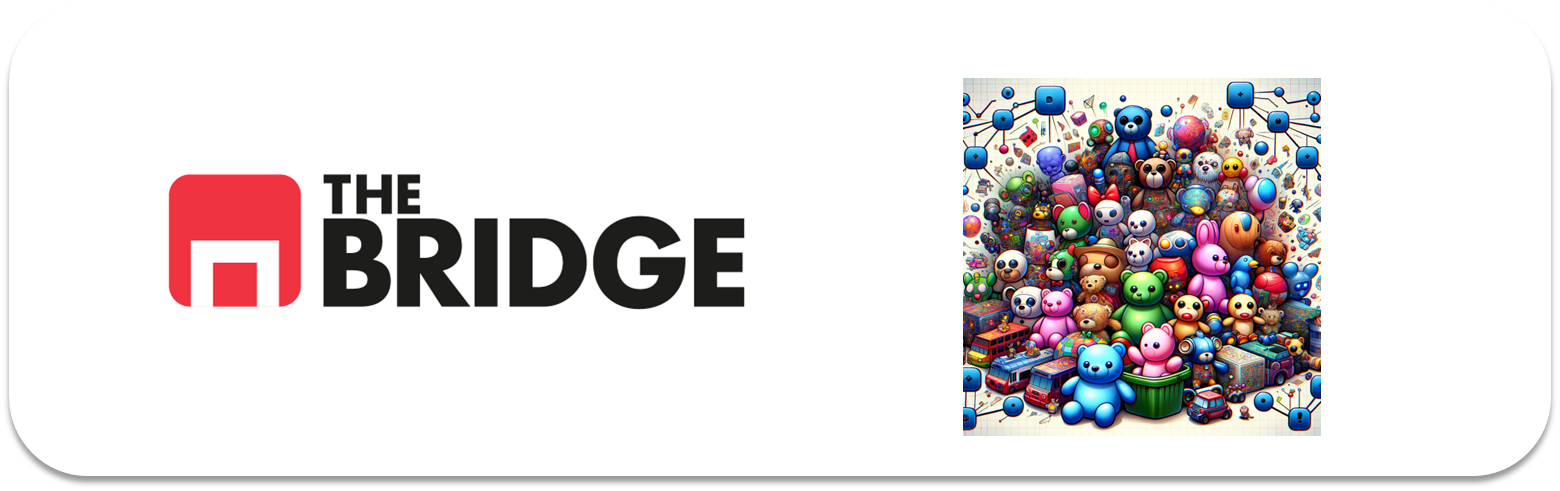

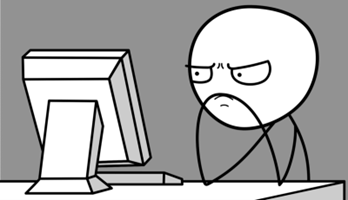

## PRACTICA OBLIGATORIA: K-MEANS

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado sobre imágenes para practicar con el algoritmo k-means. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [2]:
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

## **#1**

Vamos a trabajar con un dataset también entre los "clásicos" (aunque a veces menos conocido) que es el de rostros Olivetti. Este dataset contiene 400 imágenes en escala de grises de 64 × 64 píxeles de rostros.   


Como en otros datasets de imágenes, estás están "aplanadas" de forma que cada pixel es una feature y por cada imagen hay $64\times 64 = 4096$ features.  

Se fotografiaron 40 personas diferentes (10 veces cada una) y esas fotografías se recogen en el dataset.  

La tarea habitual es entrenar un modelo que pueda predecir qué persona está representada en cada imagen, pero nosotros lo vamos a hacer de forma no supervisada. 



### #1.1


Carga el conjunto de datos usando la función `sklearn.datasets.fetch_olivetti_faces()`. Recuerda que se carga un "diccionario". Muestra su descripción acudiendo a la clave "DESCR".

In [3]:


# Cargar el archivo
data = fetch_olivetti_faces()

# Convertir los datos en un DataFrame
df_faces = pd.DataFrame(data["data"]) # 'data' contiene las imágenes aplanada

# Mostrar las primeras filas del DataFrame
print(df_faces.head())

# Mostrar la descripción del conjunto de datos
print(data['DESCR'])

       0         1         2         3         4         5         6     \
0  0.309917  0.367769  0.417355  0.442149  0.528926  0.607438  0.657025   
1  0.454545  0.471074  0.512397  0.557851  0.595041  0.640496  0.681818   
2  0.318182  0.400826  0.491736  0.528926  0.586777  0.657025  0.681818   
3  0.198347  0.194215  0.194215  0.194215  0.190083  0.190083  0.243802   
4  0.500000  0.545455  0.582645  0.623967  0.648760  0.690083  0.694215   

       7         8         9     ...      4086      4087      4088      4089  \
0  0.677686  0.690083  0.685950  ...  0.665289  0.669421  0.652893  0.661157   
1  0.702479  0.710744  0.702479  ...  0.136364  0.157025  0.136364  0.148760   
2  0.685950  0.702479  0.698347  ...  0.074380  0.132231  0.181818  0.136364   
3  0.404959  0.483471  0.516529  ...  0.652893  0.636364  0.657025  0.685950   
4  0.714876  0.723140  0.731405  ...  0.190083  0.161157  0.177686  0.173554   

       4090      4091      4092      4093      4094      4095  
0  0

### #1.2 

Aunque no lo vas a usar hasta el final de la práctica, muestra el target. Luego cargalo todo en un mismo dataframe (tendrás que añadir el target) y obtén otro dataset con todas las imagenes reordenadas aleatoriamente (emplea por ejemplo el método `sample` del dataframe o el método que tú quieras)

In [4]:
df_faces['target'] = data["target"]   # Añadir la columna de objetivos (clases)

In [5]:
df_faces["target"]

0       0
1       0
2       0
3       0
4       0
       ..
395    39
396    39
397    39
398    39
399    39
Name: target, Length: 400, dtype: int64

In [7]:
df_faces_shuffled = df_faces.sample(frac=1, random_state=42).reset_index(drop=True)

In [8]:
df_faces_shuffled

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.198347,0.235537,0.351240,0.409091,0.421488,0.429752,0.500000,0.528926,0.524793,0.553719,...,0.508264,0.524793,0.504132,0.483471,0.471074,0.285124,0.061983,0.128099,0.090909,20
1,0.185950,0.128099,0.115702,0.132231,0.185950,0.268595,0.433884,0.541322,0.570248,0.586777,...,0.396694,0.409091,0.301653,0.421488,0.462810,0.247934,0.190083,0.210744,0.210744,28
2,0.508264,0.603306,0.619835,0.628099,0.657025,0.665289,0.690083,0.727273,0.743802,0.768595,...,0.301653,0.305785,0.314050,0.326446,0.338843,0.330579,0.334711,0.342975,0.342975,3
3,0.136364,0.140496,0.185950,0.280992,0.318182,0.363636,0.409091,0.417355,0.438017,0.454545,...,0.169421,0.206612,0.276859,0.355372,0.685950,0.661157,0.280992,0.371901,0.276859,21
4,0.652893,0.644628,0.652893,0.706612,0.714876,0.719008,0.743802,0.747934,0.747934,0.756198,...,0.074380,0.074380,0.082645,0.082645,0.111570,0.070248,0.086777,0.185950,0.231405,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.194215,0.223140,0.314050,0.500000,0.636364,0.735537,0.797521,0.826446,0.847107,0.847107,...,0.206612,0.181818,0.165289,0.123967,0.123967,0.128099,0.136364,0.169421,0.165289,7
396,0.260331,0.355372,0.648760,0.822314,0.838843,0.834711,0.830579,0.826446,0.822314,0.814050,...,0.264463,0.185950,0.136364,0.177686,0.132231,0.103306,0.103306,0.107438,0.119835,10
397,0.611570,0.644628,0.657025,0.669421,0.673554,0.710744,0.735537,0.756198,0.760331,0.768595,...,0.152893,0.107438,0.119835,0.132231,0.111570,0.136364,0.177686,0.210744,0.223140,27
398,0.285124,0.293388,0.297521,0.293388,0.219008,0.107438,0.342975,0.508264,0.533058,0.557851,...,0.388430,0.442149,0.475207,0.500000,0.516529,0.520661,0.533058,0.533058,0.537190,34


### #1.3

Vamos a dividir en train y test, pero OJO RECUERDA QUE EN LOS PROBLEMAS NO SUPERVISADOS NO HAY SPLIT (porque no hay target), aquí lo hacemos para poder comparar posteriormente el clustering con la clasificación (ya que es uan práctica formativa).

Por tanto, divídelo en un conjunto de entrenamiento, un conjunto de validación y un conjunto de pruebas (80-10-10). Dado que el conjunto de datos es bastante pequeño, emplea un muestreo estratificado para asegurarse de que haya el mismo número de imágenes por persona en cada conjunto (estratificando por la columna que contenga el target)

NOTA: No hemos hecho hasta ahora la separación en tres sets, investiga por tu cuenta o bien haz primero un split 90-10 y luego otro split 89-11 sobre el de 80 (para que de los números aproximados), por ejemplo.

In [9]:
from sklearn.model_selection import train_test_split

# Split inicial: 90% (train + validation) y 10% (test)
df_train, df_temp = train_test_split(df_faces_shuffled,test_size=0.20, stratify=df_faces_shuffled["target"], random_state=42)

# Split dentro de train+valid: 80% train y 20% validation (aproximadamente)
# El tamaño de validación es aproximadamente 11.1% del total original (10% / 90%)
df_val, df_test = train_test_split(df_temp, test_size=0.5, stratify=df_temp["target"], random_state=42)

# Aquí nos quedamos con X_train, X_val y X_test para usar en clustering.
# Usaremos y_train, y_val, y_test solo para evaluar la calidad del clustering (no para entrenar el modelo).

# Verificación de tamaños
print(f"Train size: {len(df_train)}")
print(f"Validation size: {len(df_val)}")
print(f"Test size: {len(df_test)}")



Train size: 320
Validation size: 40
Test size: 40


### #1.4

Crea los pares X,y para train, validation y test.

In [10]:
X_train = df_train.drop(["target"], axis=1)
y_train = df_train["target"]

X_val = df_val.drop(["target"], axis=1)
y_val = df_val["target"]

X_test = df_test.drop(["target"], axis=1)
y_test = df_test["target"]

Utiliza la siguiente función para visualizar alguna de las caras (observa que tienes que dar la X y la y, usa iloc en ambos datasets)

In [11]:
def plot_faces(faces, labels, n_cols=5):
    # Asegúrate de que 'faces' sea un array de NumPy
    faces = np.array(faces)

    # Si solo se pasa un solo elemento, conviértelo en una lista
    if faces.ndim == 1:
        faces = faces.reshape(1, 64, 64)  # Reshape para una sola imagen
        labels = [labels]  # Convierte la etiqueta a una lista

    else:
        faces = faces.reshape(-1, 64, 64)

    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
        
    plt.show()

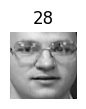

In [12]:
plot_faces(X_train.iloc[1], y_train[1])

### #1.5

Para acelerar las cosas, reduciremos la dimensionalidad de los datos utilizando PCA (técnica que veremos en el siguiente sprint). Modifica la siguiente celda de forma que las X se correspondan con las que has utilizado en el ejercicio anterior.

In [13]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

pca.n_components_

221

### 1.6

Aquí viene la parte del león. A continuación, agrupa las imágenes utilizando K-Means sobre el dataset de train reducido en el ejercicio anterior. Emplea el método del máximo de score de silueta para obtener el mejor k, probando con K de 5 en 5 hasta 150. ¿Cuál es el k que proporciona el mejor score de silueta? NOTA: Emplea todas las features (no hace falta seleccionar, y ya están escaladas entre 0 y 1)

In [14]:
# Listas para almacenar resultados
silueta_scores = []
k_values = range(5, 151, 5)  # Valores de k de 5 en 5 hasta 150

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X_train)  # Ajustar y predecir clusters
    score = silhouette_score(X_train, cluster_labels)  # Calcular score de silueta
    silueta_scores.append(score)
    print(f'k={k}, Silhouette Score={round(score,4)}')  # Mostrar resultados

# Encontrar el mejor k
best_k = k_values[np.argmax(silueta_scores)]
best_score = max(silueta_scores)

print(f'\nEl mejor k es {best_k} con un score de silueta de {round(score,4)}')

k=5, Silhouette Score=0.10530000180006027
k=10, Silhouette Score=0.08540000021457672
k=15, Silhouette Score=0.09799999743700027
k=20, Silhouette Score=0.10589999705553055
k=25, Silhouette Score=0.11739999800920486
k=30, Silhouette Score=0.1370999962091446
k=35, Silhouette Score=0.13699999451637268
k=40, Silhouette Score=0.1518000066280365
k=45, Silhouette Score=0.1542000025510788
k=50, Silhouette Score=0.15479999780654907
k=55, Silhouette Score=0.16830000281333923
k=60, Silhouette Score=0.16449999809265137
k=65, Silhouette Score=0.1785999983549118
k=70, Silhouette Score=0.17520000040531158
k=75, Silhouette Score=0.1800999939441681
k=80, Silhouette Score=0.17900000512599945
k=85, Silhouette Score=0.1949000060558319
k=90, Silhouette Score=0.18629999458789825
k=95, Silhouette Score=0.19179999828338623
k=100, Silhouette Score=0.20029999315738678
k=105, Silhouette Score=0.18320000171661377
k=110, Silhouette Score=0.19850000739097595
k=115, Silhouette Score=0.19269999861717224
k=120, Silhoue

### #1.7

Repite el ejercio anterior empleando ahora el método del codo de Inercia. ¿Sale algo más concluyente o que refuerce el anterior resultado?

k=5, Inercia=17316.3926
k=10, Inercia=15362.4258
k=15, Inercia=14091.7344
k=20, Inercia=12889.4912
k=25, Inercia=11919.2617
k=30, Inercia=11130.1016
k=35, Inercia=10246.1670
k=40, Inercia=9643.8281
k=45, Inercia=9030.4258
k=50, Inercia=8527.4531
k=55, Inercia=7769.2480
k=60, Inercia=7430.9634
k=65, Inercia=7109.2139
k=70, Inercia=6788.0947
k=75, Inercia=6422.3296
k=80, Inercia=6162.7012
k=85, Inercia=5853.9473
k=90, Inercia=5578.9082
k=95, Inercia=5290.4707
k=100, Inercia=4959.9326
k=105, Inercia=4792.0801
k=110, Inercia=4586.2109
k=115, Inercia=4361.3052
k=120, Inercia=4119.0791
k=125, Inercia=3888.9136
k=130, Inercia=3664.3579
k=135, Inercia=3498.6479
k=140, Inercia=3310.2820
k=145, Inercia=3155.7087
k=150, Inercia=2970.8379


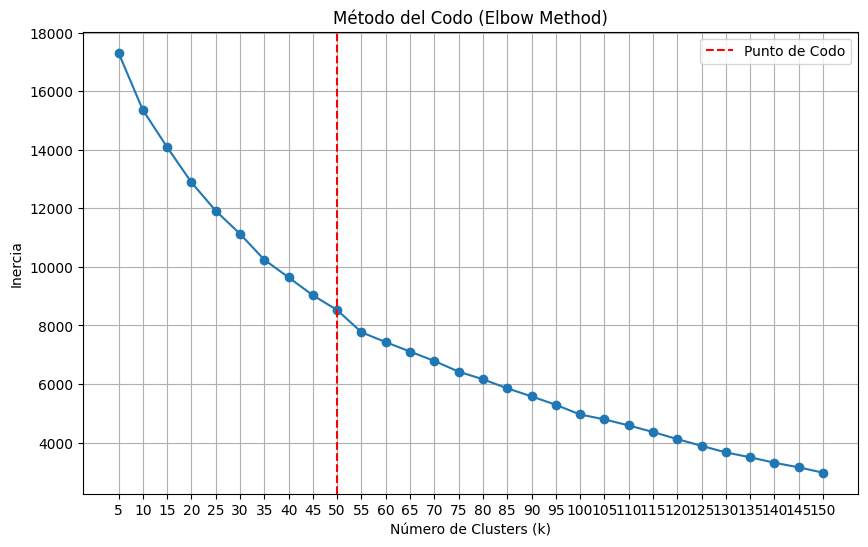

In [15]:

inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)  # Ajustar el modelo
    inertia_values.append(kmeans.inertia_)  # Almacenar la inercia
    print(f'k={k}, Inercia={kmeans.inertia_:.4f}')  # Mostrar resultados

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Método del Codo (Elbow Method)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.xticks(k_values)
plt.grid()
plt.axvline(x=k_values[np.argmin(np.diff(inertia_values, 2)) + 1], color='r', linestyle='--', label='Punto de Codo')
plt.legend()
plt.show()

### #1.8

Quédate con el k obtenido con el método del score de silueta y asigna el modelo con ese k a una variable `best_model`

In [16]:
# Crear el modelo K-Means con el mejor k
best_model = KMeans(n_clusters=best_k, random_state=42)

# Ajustar el modelo a los datos de entrenamiento
best_model.fit(X_train)

# Si deseas ver los centros de los clusters
print(f'Centros de los clusters:\n{best_model.cluster_centers_}')

Centros de los clusters:
[[0.42975205 0.47992915 0.5224321  ... 0.33766234 0.32585597 0.3276269 ]
 [0.5338843  0.54710746 0.5520661  ... 0.4958678  0.46198344 0.407438  ]
 [0.19008264 0.25619835 0.3553719  ... 0.2520661  0.23553719 0.19008264]
 ...
 [0.7706611  0.77272725 0.7665289  ... 0.23347108 0.23347108 0.23347108]
 [0.24380165 0.30578512 0.37190083 ... 0.2603306  0.24793388 0.24793388]
 [0.5206612  0.5206612  0.53305787 ... 0.46694216 0.43801653 0.43801653]]


In [17]:
train_labels = best_model.predict(X_train)

In [18]:
train_labels

array([ 37,   4,  35, 108,  25, 110, 106,  32,  77,  70,  79,  86,  60,
        99,  88,   5, 103,  45,  20,  74,  75,   6,  29,  50,  12,  52,
        25,  28,  48,  37, 109,  59,  24,   8,  17,  36, 100,  24,  45,
        98,  60, 118,  96,  87,  85,  22,   7,  70, 100, 108, 117,  76,
        15,  27,   6,  75,  30,  99,   5, 112,   5, 100,  96,  39,  86,
        19,   3,  82,  16,  84,  33,  23,  10,  44,  16,   7,  64, 105,
         0,  15,  43,   9, 101,  26,   1,  11,  52,  10,  97,  87,  69,
        11,  25,  19,  13,  58, 116, 100,  14,   9,  43,  34,  91,  78,
       102,  98,  34,  33,   9,  66, 110, 115, 107,  68,   4,  72,  33,
        27,  41,   0,  38,   8,  11,  98,  10,  55,   7,  85,  95,  76,
        38,  48,  65,  26, 113,   0,  81,  73,  83,   8,   7, 106,  53,
        26,  94,  42,  33,  68,   7,  71, 104,   9,  15,  15,  23,   0,
       100,  64,  61,  26,  71,  41,  16,  25,  90,  46,  49,  23,  92,
         4,  93,   9,  74,  27,   0, 104, 115,  78, 117,  14,  8

### #1.9

Haz una valoración del método de clustering para el K elegido. Para ello crea un programa que recorra la lista de etiquetas dadas por "best_model" y que, haciendo uso de la función que ya te hemos proporcionado, pinte las caras asignadas a los 10 primeros clústeres. Ojo tendrás que hacer una pequeña adaptación porque las features de entrenamiento no son las features reales (son una "transformación" de estas) y si pasas el X de entrenamiento no verás nada. ¿Ves caras similares?

In [19]:

def plot_faces(faces, labels, n_cols=5):
    faces = np.array(faces)
    
    if faces.ndim == 1:
        faces = faces.reshape(1, 64, 64)  # Reshape para una sola imagen
        labels = [labels]  # Convierte la etiqueta a una lista
    else:
        faces = faces.reshape(-1, 64, 64)

    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
        
    plt.show()


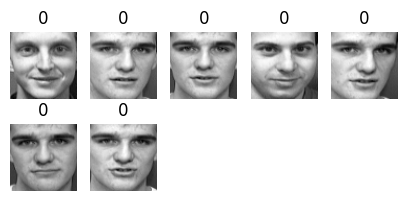

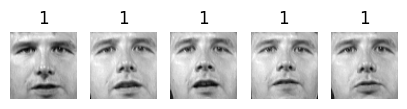

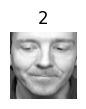

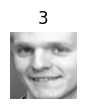

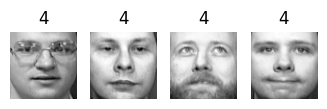

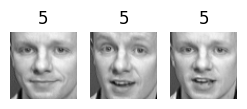

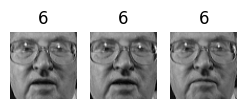

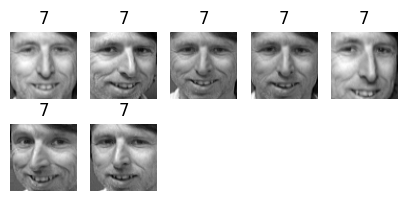

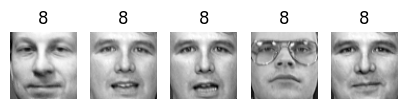

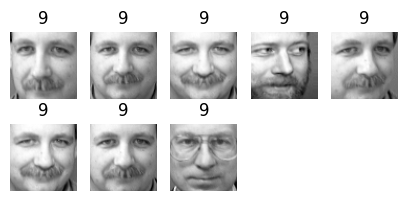

In [20]:
unique_labels = np.unique(train_labels)
# Recorrer los primeros 10 clusters
for cluster in unique_labels[:10]:
    # Obtener las imágenes correspondientes a este cluster
    cluster_images = X_train[train_labels == cluster]
    
    # Mostrar algunas imágenes del cluster
    plot_faces(cluster_images[:10], [cluster] * min(10, len(cluster_images)))  # Mostrar hasta 10 imágenes

## **#2**


### #2.1


Continuando con el conjunto de datos de caras Olivetti, entrena un clasificador para predecir qué persona está representada en cada imagen, y evalúalo en el conjunto de validación. Utiliza un RandomForest con 150 submodelos o estimadores (y el resto de hiperparámetros déjalos a su valor por defecto)

In [21]:
# Crear el modelo RandomForest con 150 estimadores
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [22]:
# Predecir las etiquetas del conjunto de validación
y_val_pred = rf_model.predict(X_val)

# Calcular el accuracy en el conjunto de validación
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Accuracy en el conjunto de validación: {val_accuracy}')

# Imprimir un informe de clasificación detallado
print("\nInforme de clasificación en el conjunto de validación:")
print(classification_report(y_val, y_val_pred))

Accuracy en el conjunto de validación: 0.925

Informe de clasificación en el conjunto de validación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       0.50      1.00      0.67         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

### #2.2

Utiliza K-Means como una herramienta de reducción de dimensionalidad y entrena un clasificador en el conjunto reducido. Para ello emplea el método transform de manera que ahora las features de entrada sean las distancias de cada punto a los centroides del modelo "best_model" de la parte anterior. Por ejemplo:
```python
X_train_reduced = best_model.transform(X_train_pca) 
```


Ojo lo tienes que aplicar a todos los datasets. Luego vuelve a entrenar un RandomForest sobre este dataset y evalualo contra el dataset de validacion.

In [23]:
# Transformar los conjuntos de datos usando el modelo K-Means entrenado
X_train_reduced = best_model.transform(X_train)  # Distancias del train a los centroides
X_val_reduced = best_model.transform(X_val)      # Distancias del validation a los centroides
X_test_reduced = best_model.transform(X_test)    # Distancias del test a los centroides

# Verifica las formas de los datos reducidos
print(f"Shape de X_train reducido: {X_train_reduced.shape}")
print(f"Shape de X_val reducido: {X_val_reduced.shape}")
print(f"Shape de X_test reducido: {X_test_reduced.shape}")

Shape de X_train reducido: (320, 120)
Shape de X_val reducido: (40, 120)
Shape de X_test reducido: (40, 120)


In [25]:
# Crear el modelo RandomForest con 150 estimadores
rf_model_reduced = RandomForestClassifier(n_estimators=150, random_state=42)

# Entrenar el modelo con los datos transformados (reducidos)
rf_model_reduced.fit(X_train_reduced, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [26]:
# Predecir las etiquetas del conjunto de validación con el modelo entrenado en el espacio reducido
y_val_pred_reduced = rf_model_reduced.predict(X_val_reduced)

# Calcular la precisión (accuracy) en el conjunto de validación
val_accuracy_reduced = accuracy_score(y_val, y_val_pred_reduced)
print(f'Accuracy en el conjunto de validación (reducido): {val_accuracy_reduced:.4f}')

# Imprimir un informe de clasificación detallado
print("\nInforme de clasificación en el conjunto de validación (reducido):")
print(classification_report(y_val, y_val_pred_reduced))

Accuracy en el conjunto de validación (reducido): 0.8250

Informe de clasificación en el conjunto de validación (reducido):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       0.00      0.00      0.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          1

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

### #2.3 EXTRA VOLUNTARIO

Busca el número de clusters k que generen un algoritmo kmeans que a su vez sus distancias a los centroides sean las features de un clasificador RandomForest y que permita al clasificador obtener el mejor rendimiento: ¿Qué rendimiento puedes alcanzar? (en terminos de Accuracy)